In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = datasets.load_wine(as_frame = True)


X = data.data
y = data.target

import pandas as pd
df = pd.DataFrame(X)
features= df.columns
cn= pd.DataFrame([0,1,2])


scale = StandardScaler() #standardization
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22) #train test split



# Decision Tree Classifier

Train data accuracy: 1.0
Test data accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.79      0.88      0.83        17
           2       0.92      0.80      0.86        15

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



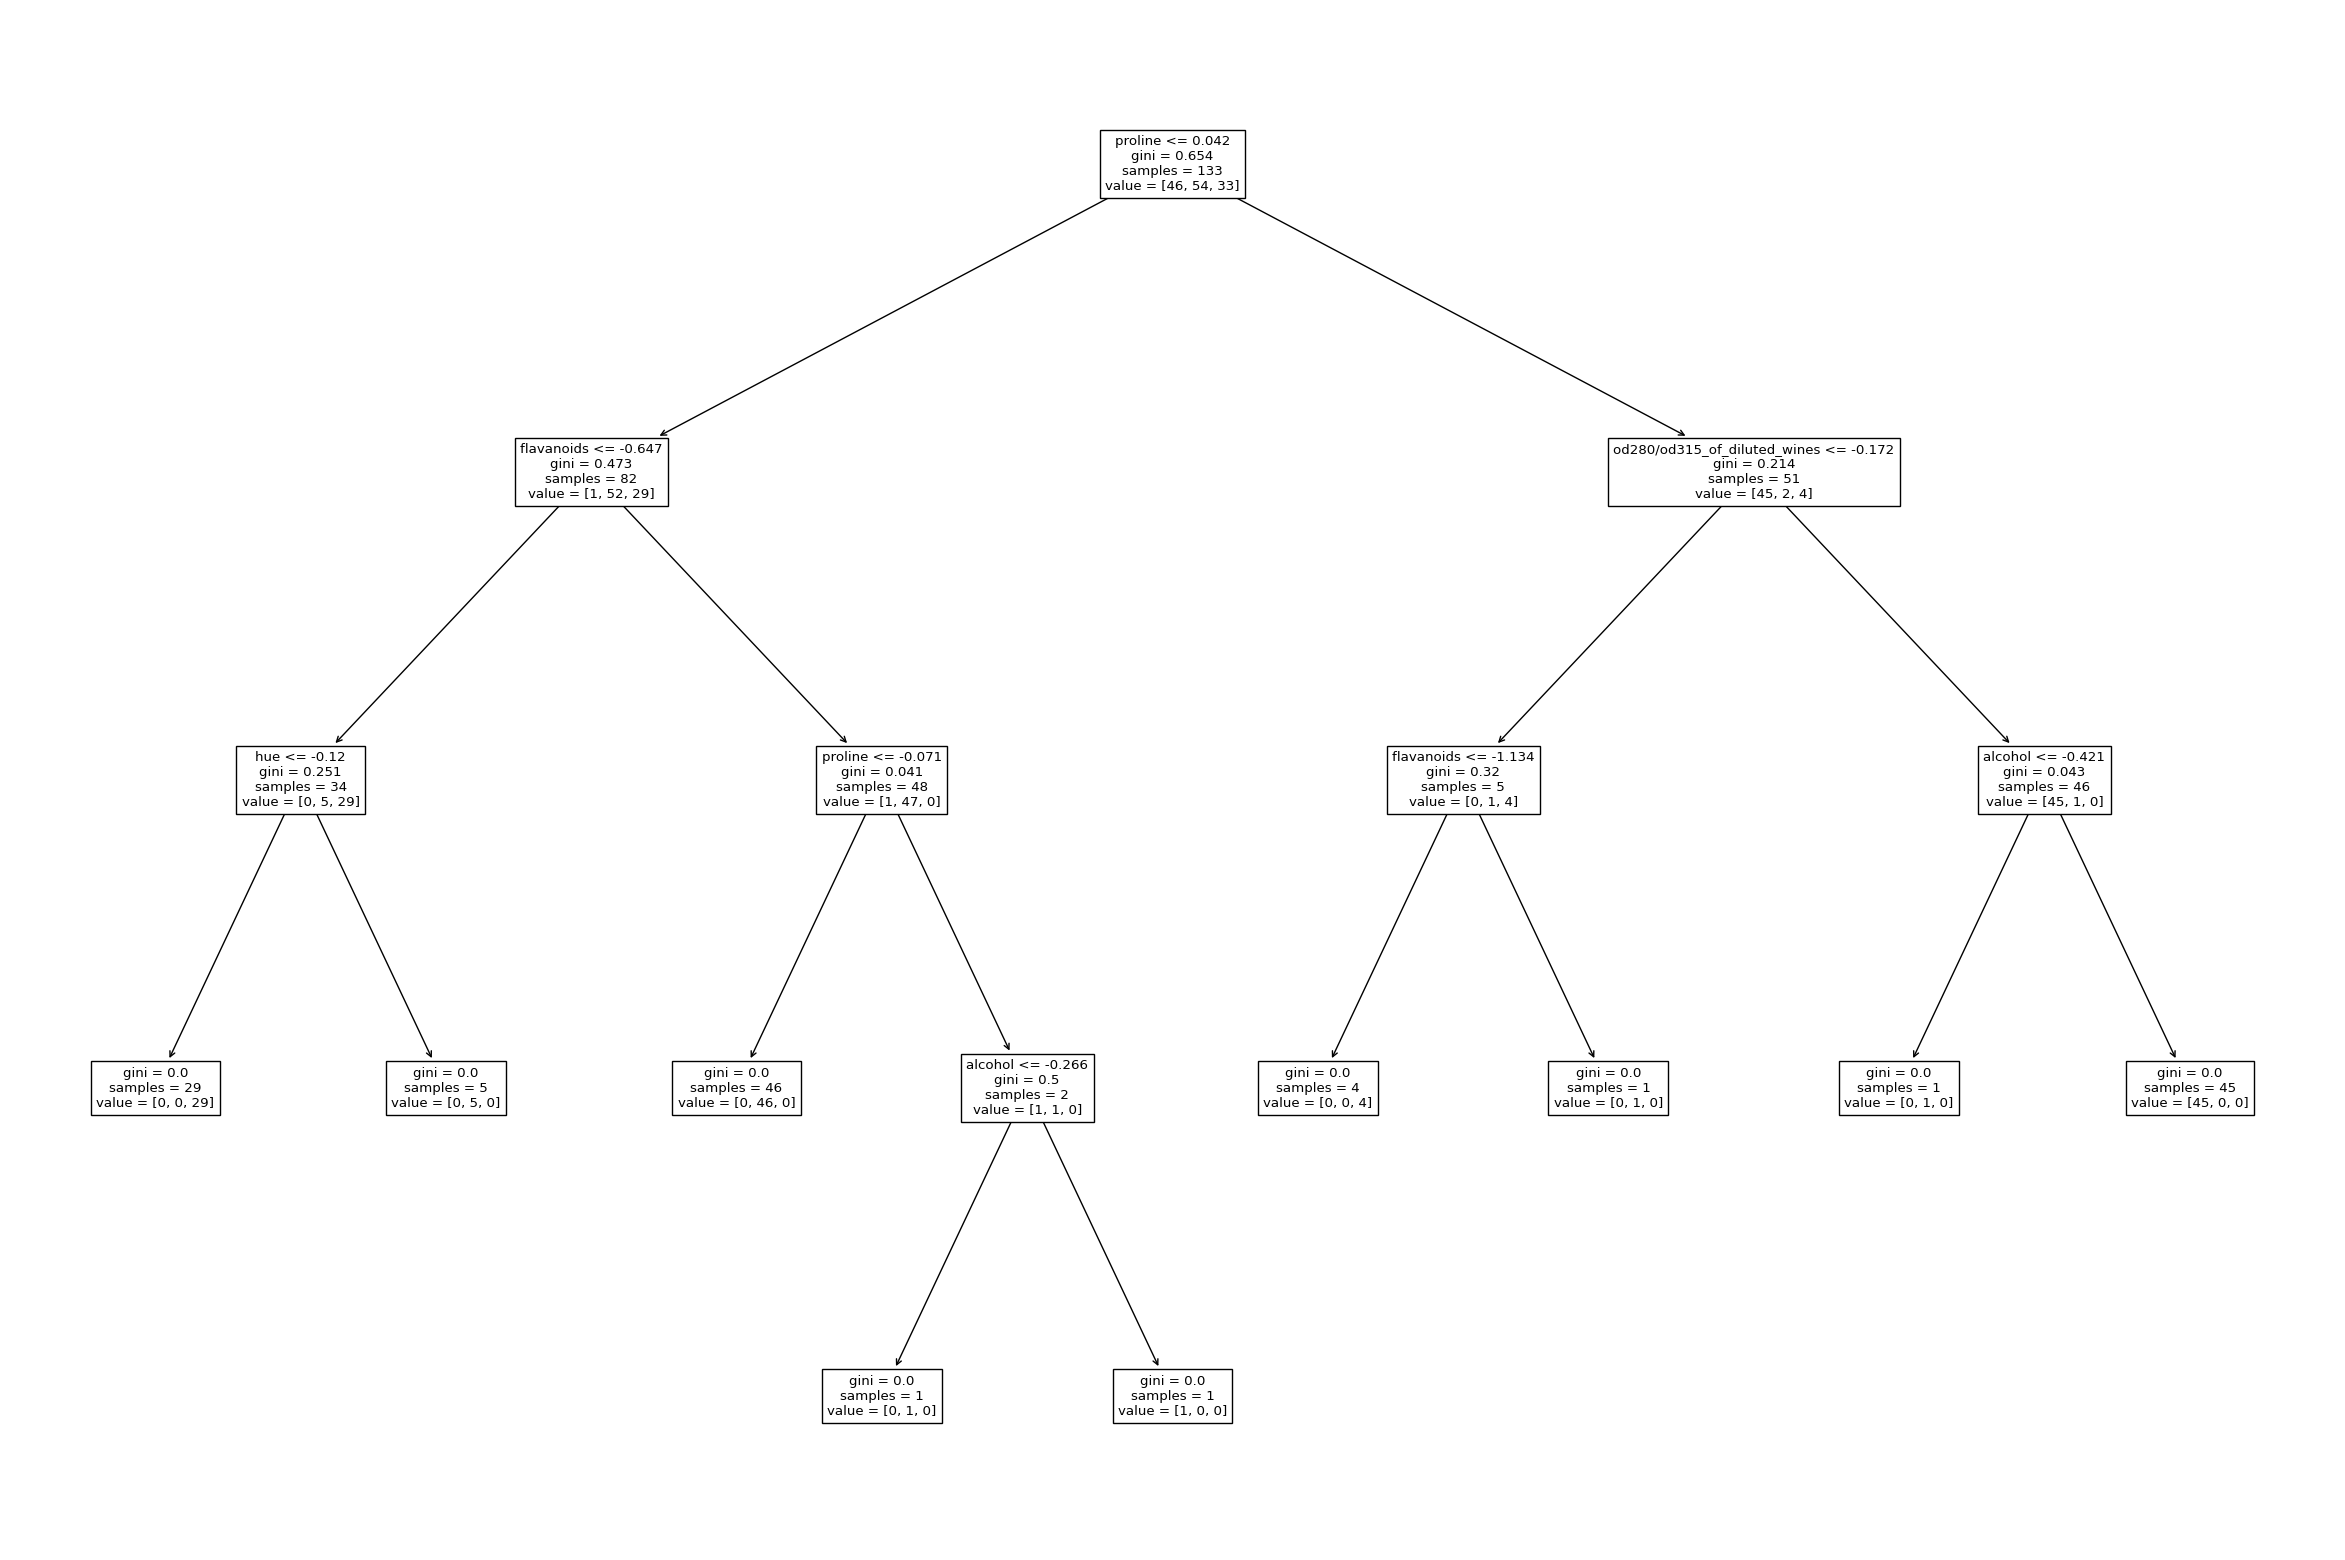

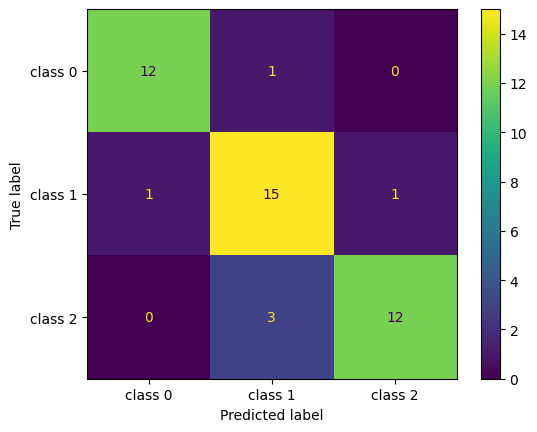

In [16]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

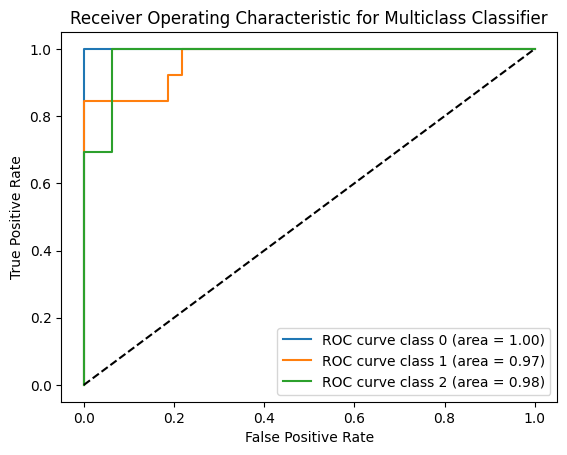

Macro-Average AUC: 0.983173076923077


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the iris dataset as an example (multiclass)
data = datasets.load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a multiclass LogisticRegression classifier
clf = LogisticRegression(max_iter=1000, multi_class='ovr')
clf.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = clf.predict_proba(X_test) #one-vs-rest strategy

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve class {} (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classifier')
plt.legend(loc="lower right")
plt.show()

# Print macro-average AUC
print("Macro-Average AUC:", macro_auc)

# KNeighbors Classifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

Train data accuracy: 0.9849624060150376
Test data accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.82      0.90        17
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



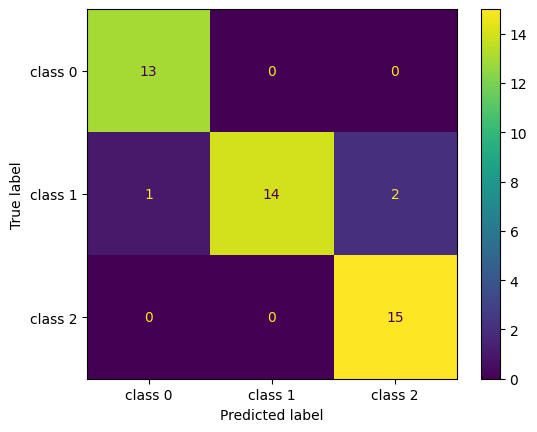

In [4]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = knn.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = knn.predict(X_test)))


c1=classification_report(y_test, knn.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()



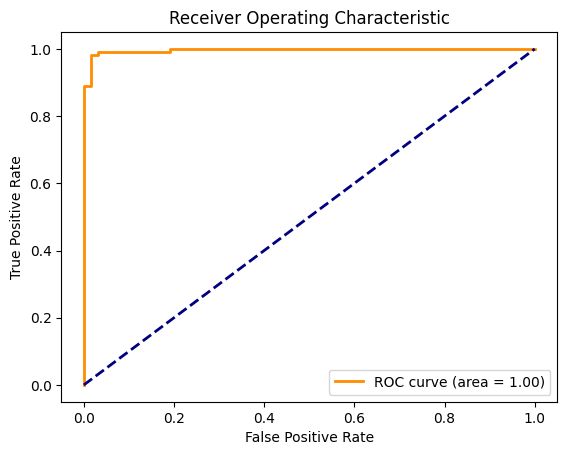

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Load the breast cancer dataset as an example
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Compute decision function values
decision_values = svm.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



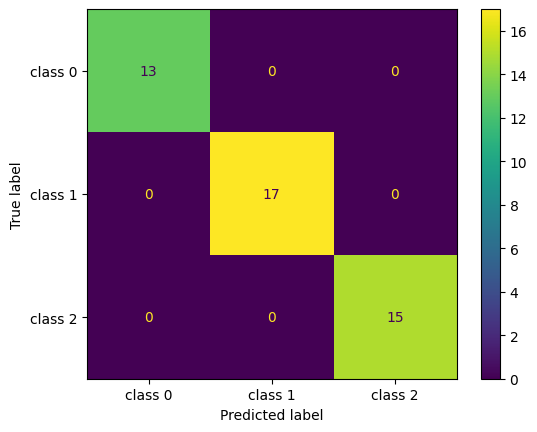

In [5]:
#Logistic Regression

from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

# Bagging Classifier

Train data accuracy: 1.0
Test data accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.79      0.88      0.83        17
           2       0.92      0.80      0.86        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.85        45
weighted avg       0.85      0.84      0.84        45



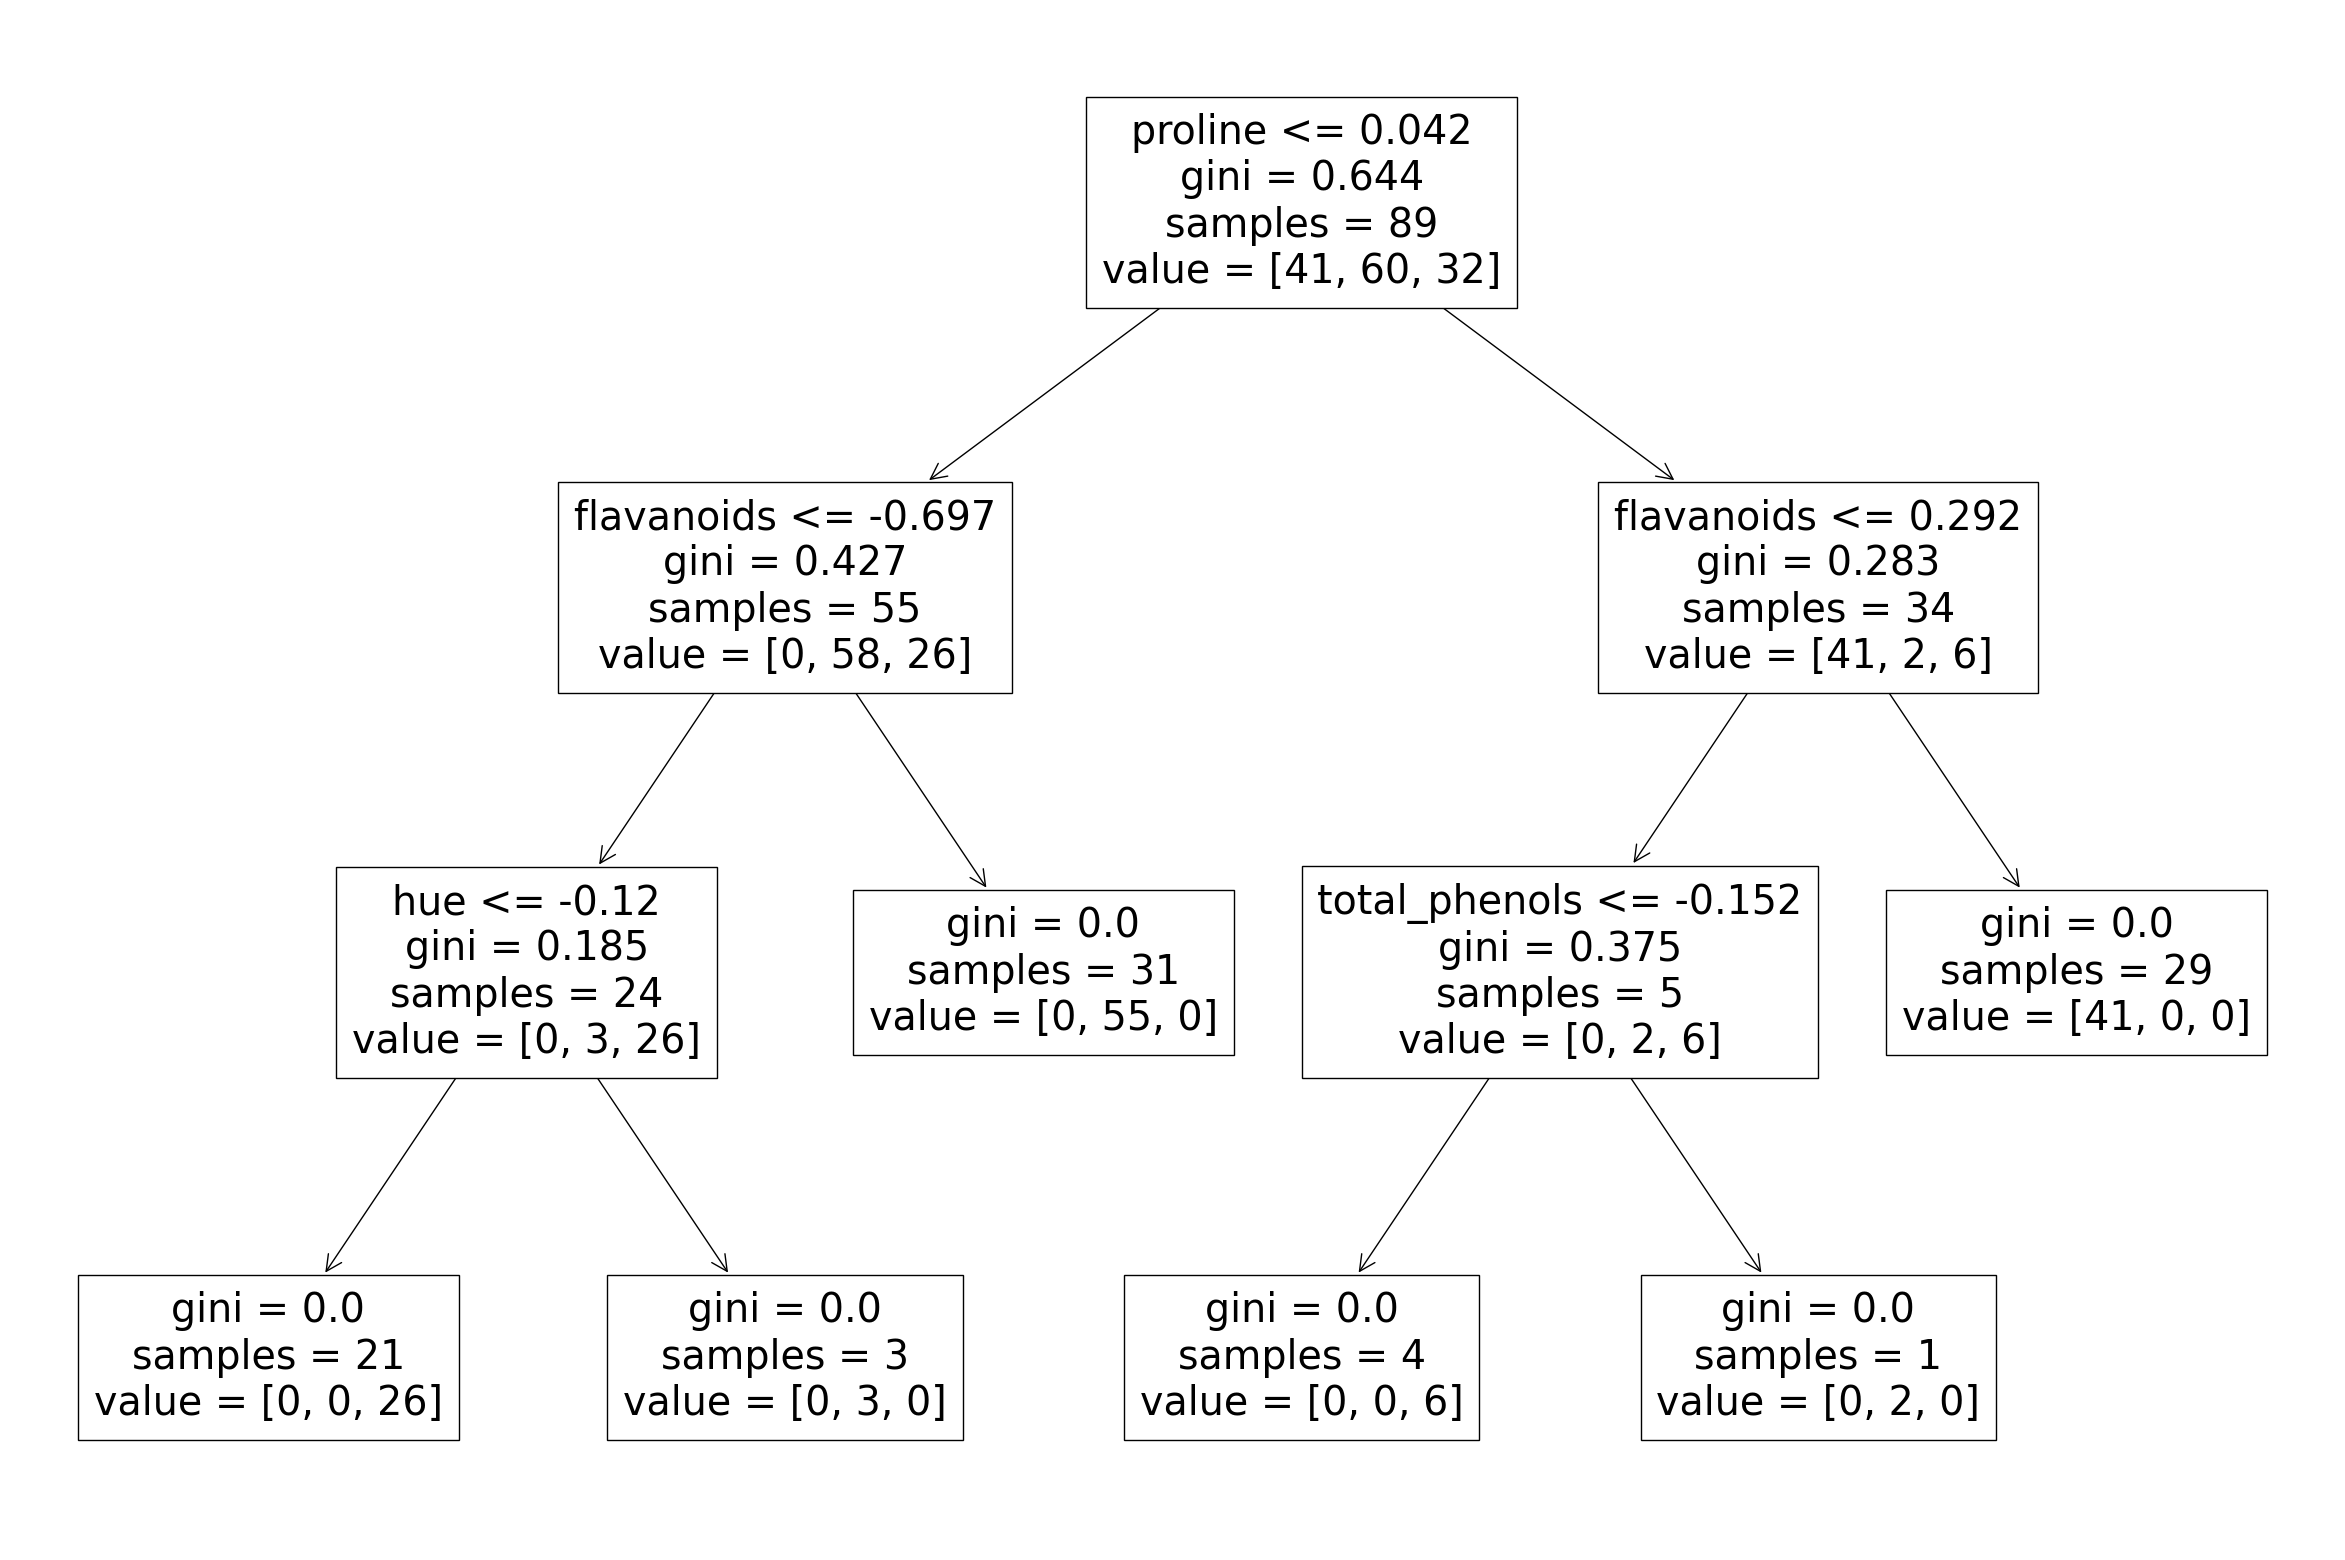

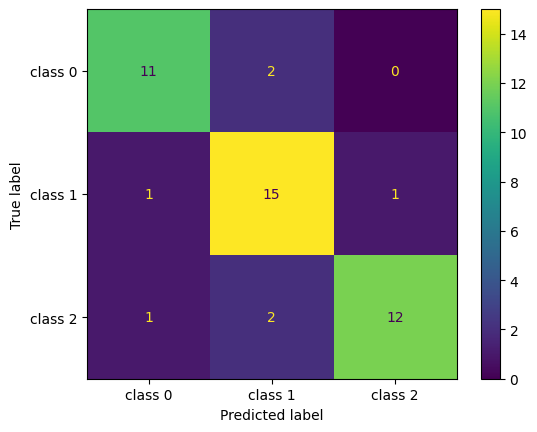

In [6]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


plt.figure(figsize=(30, 20))
plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

# AdaBoost Classifier

Train data accuracy: 1.0
Test data accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.84      0.94      0.89        17
           2       0.93      0.87      0.90        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.92      0.91      0.91        45



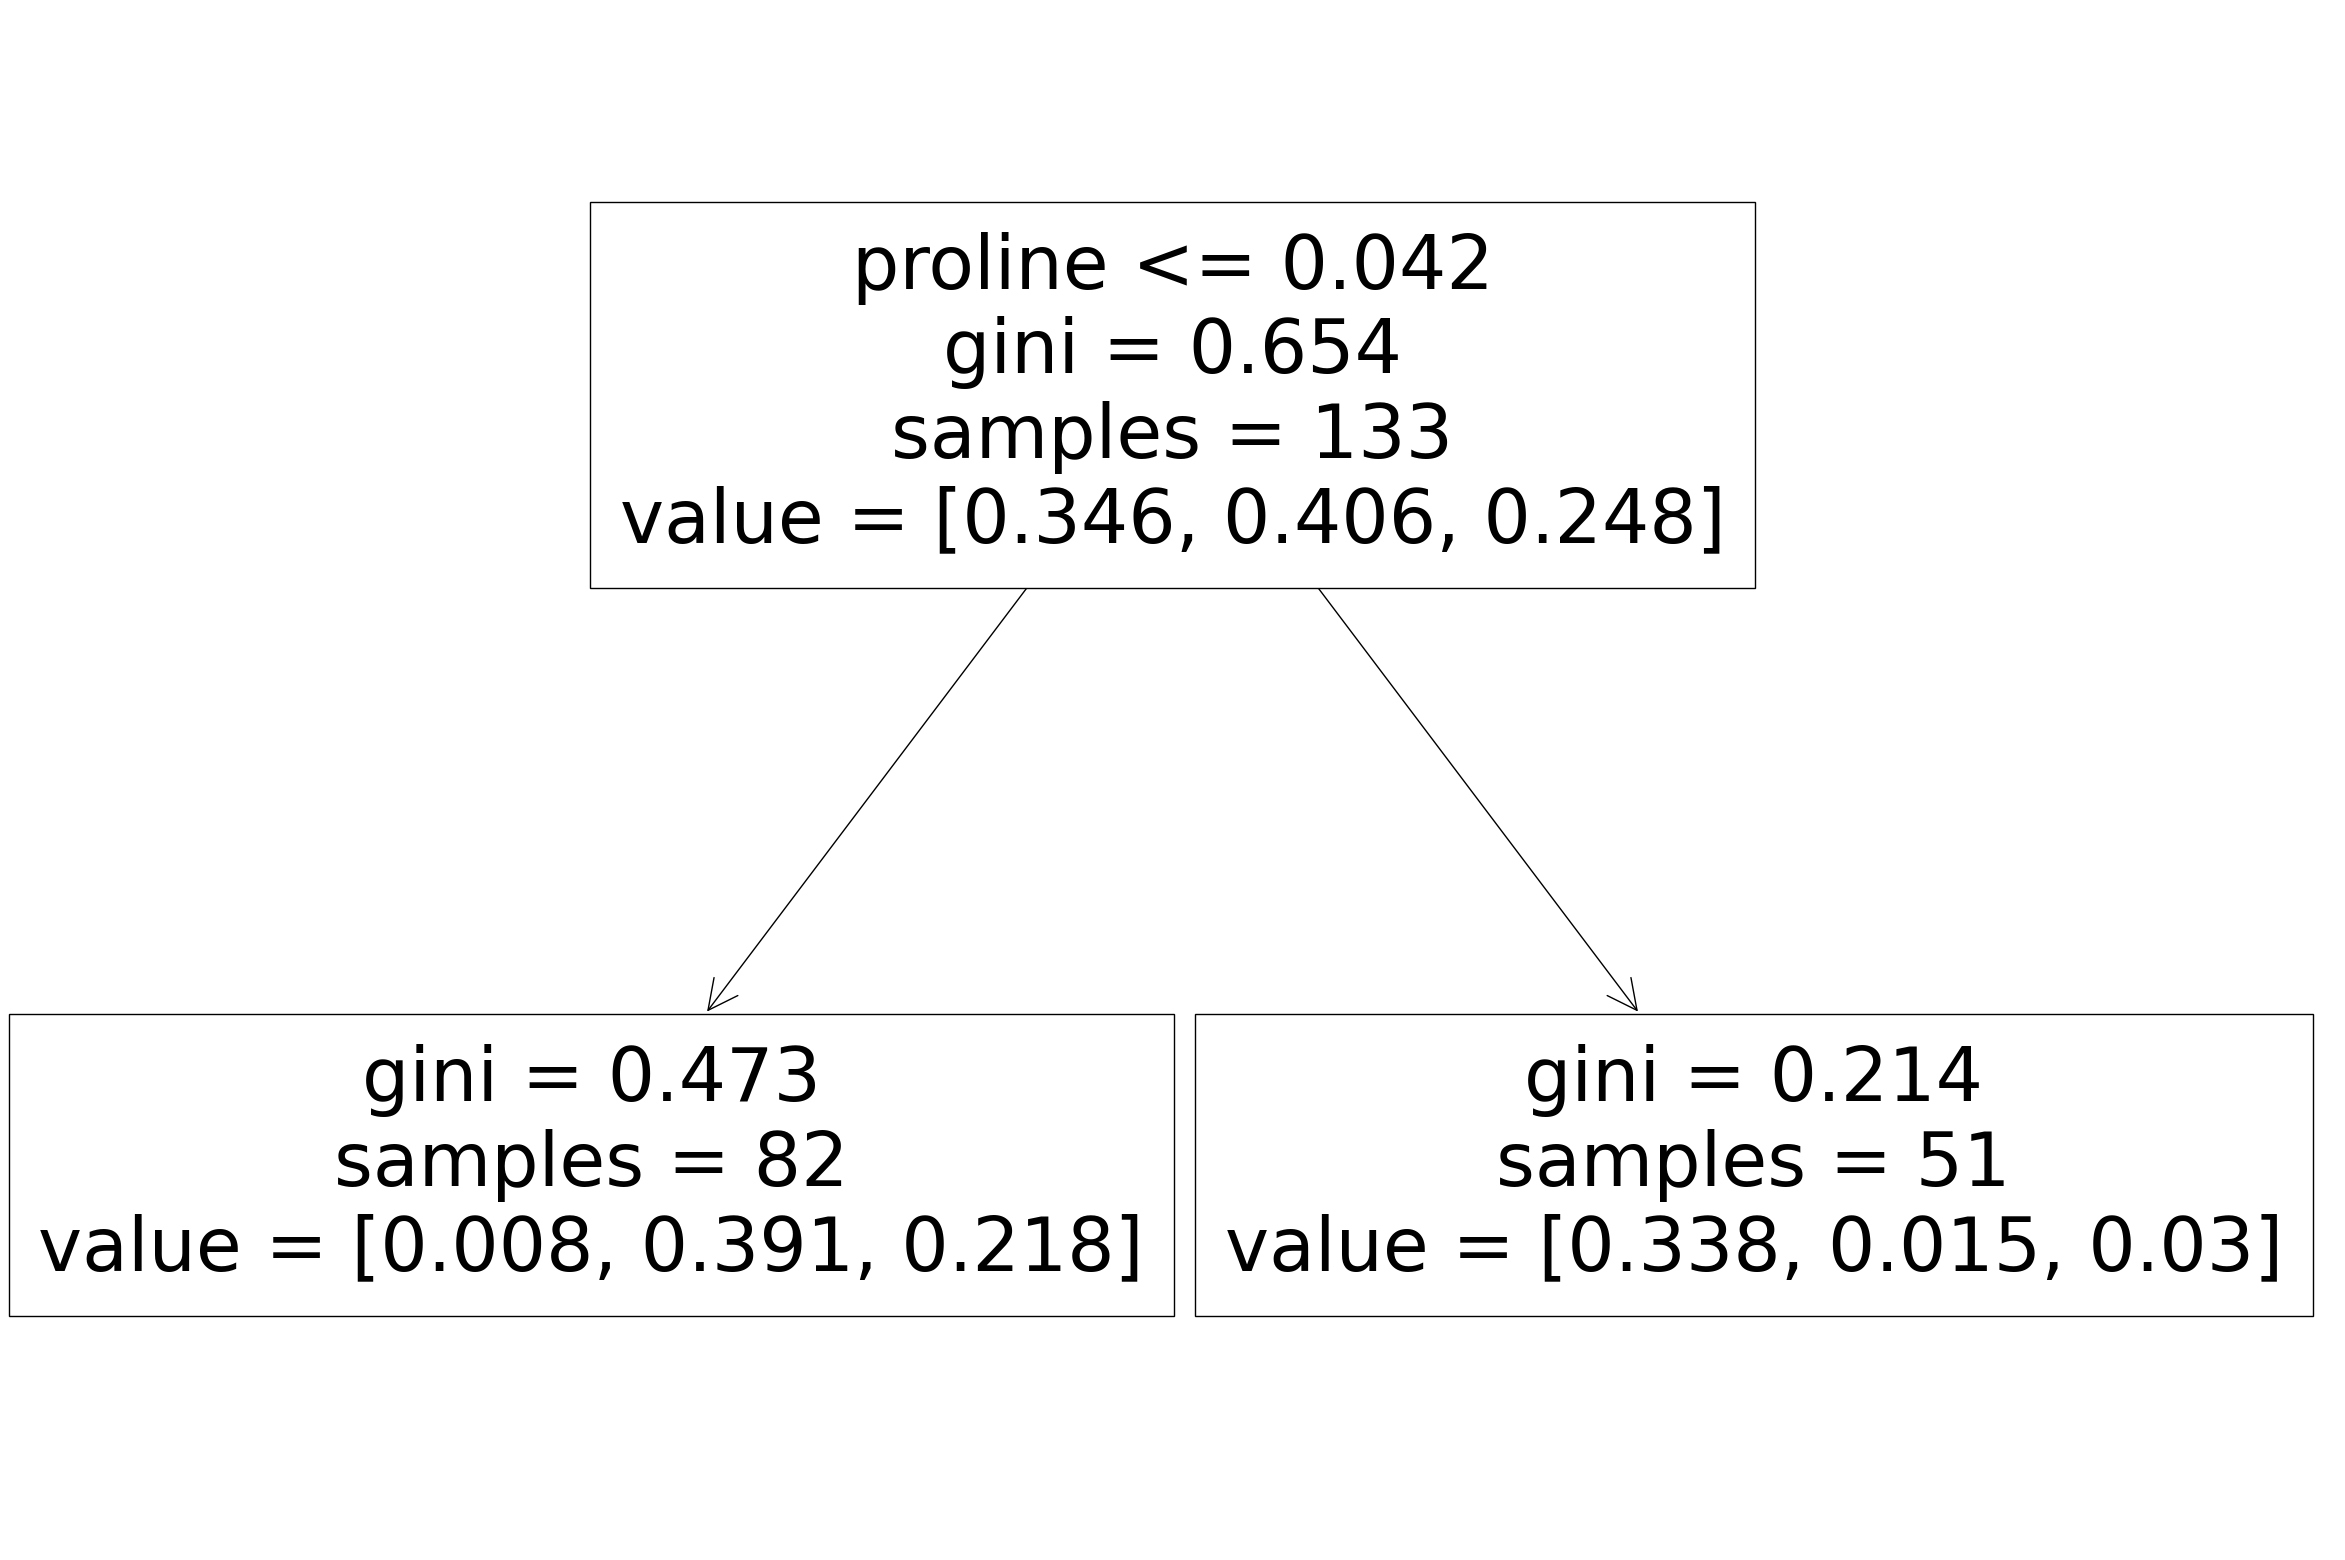

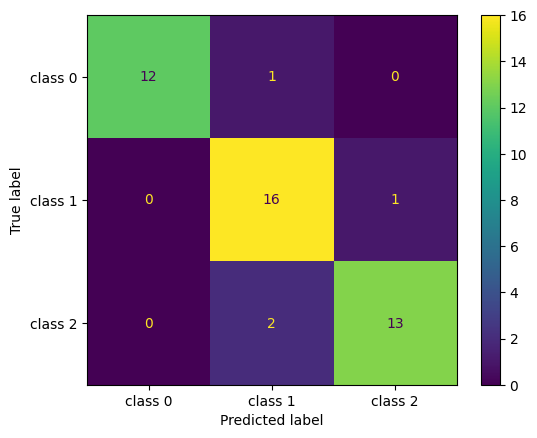

In [7]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))


c1=classification_report(y_test, ada.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()


# Naive bayes classifier

Train data accuracy: 0.9548872180451128
Test data accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.93      0.76      0.84        17
           2       0.93      0.93      0.93        15

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



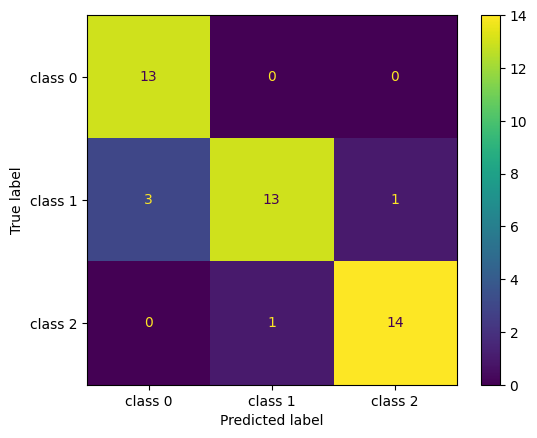

In [8]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))


c1=classification_report(y_test, bnb.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bnb.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()


# Random Forest Classifier

Train data accuracy: 1.0
Test data accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.88      0.94        17
           2       0.94      1.00      0.97        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.95        45



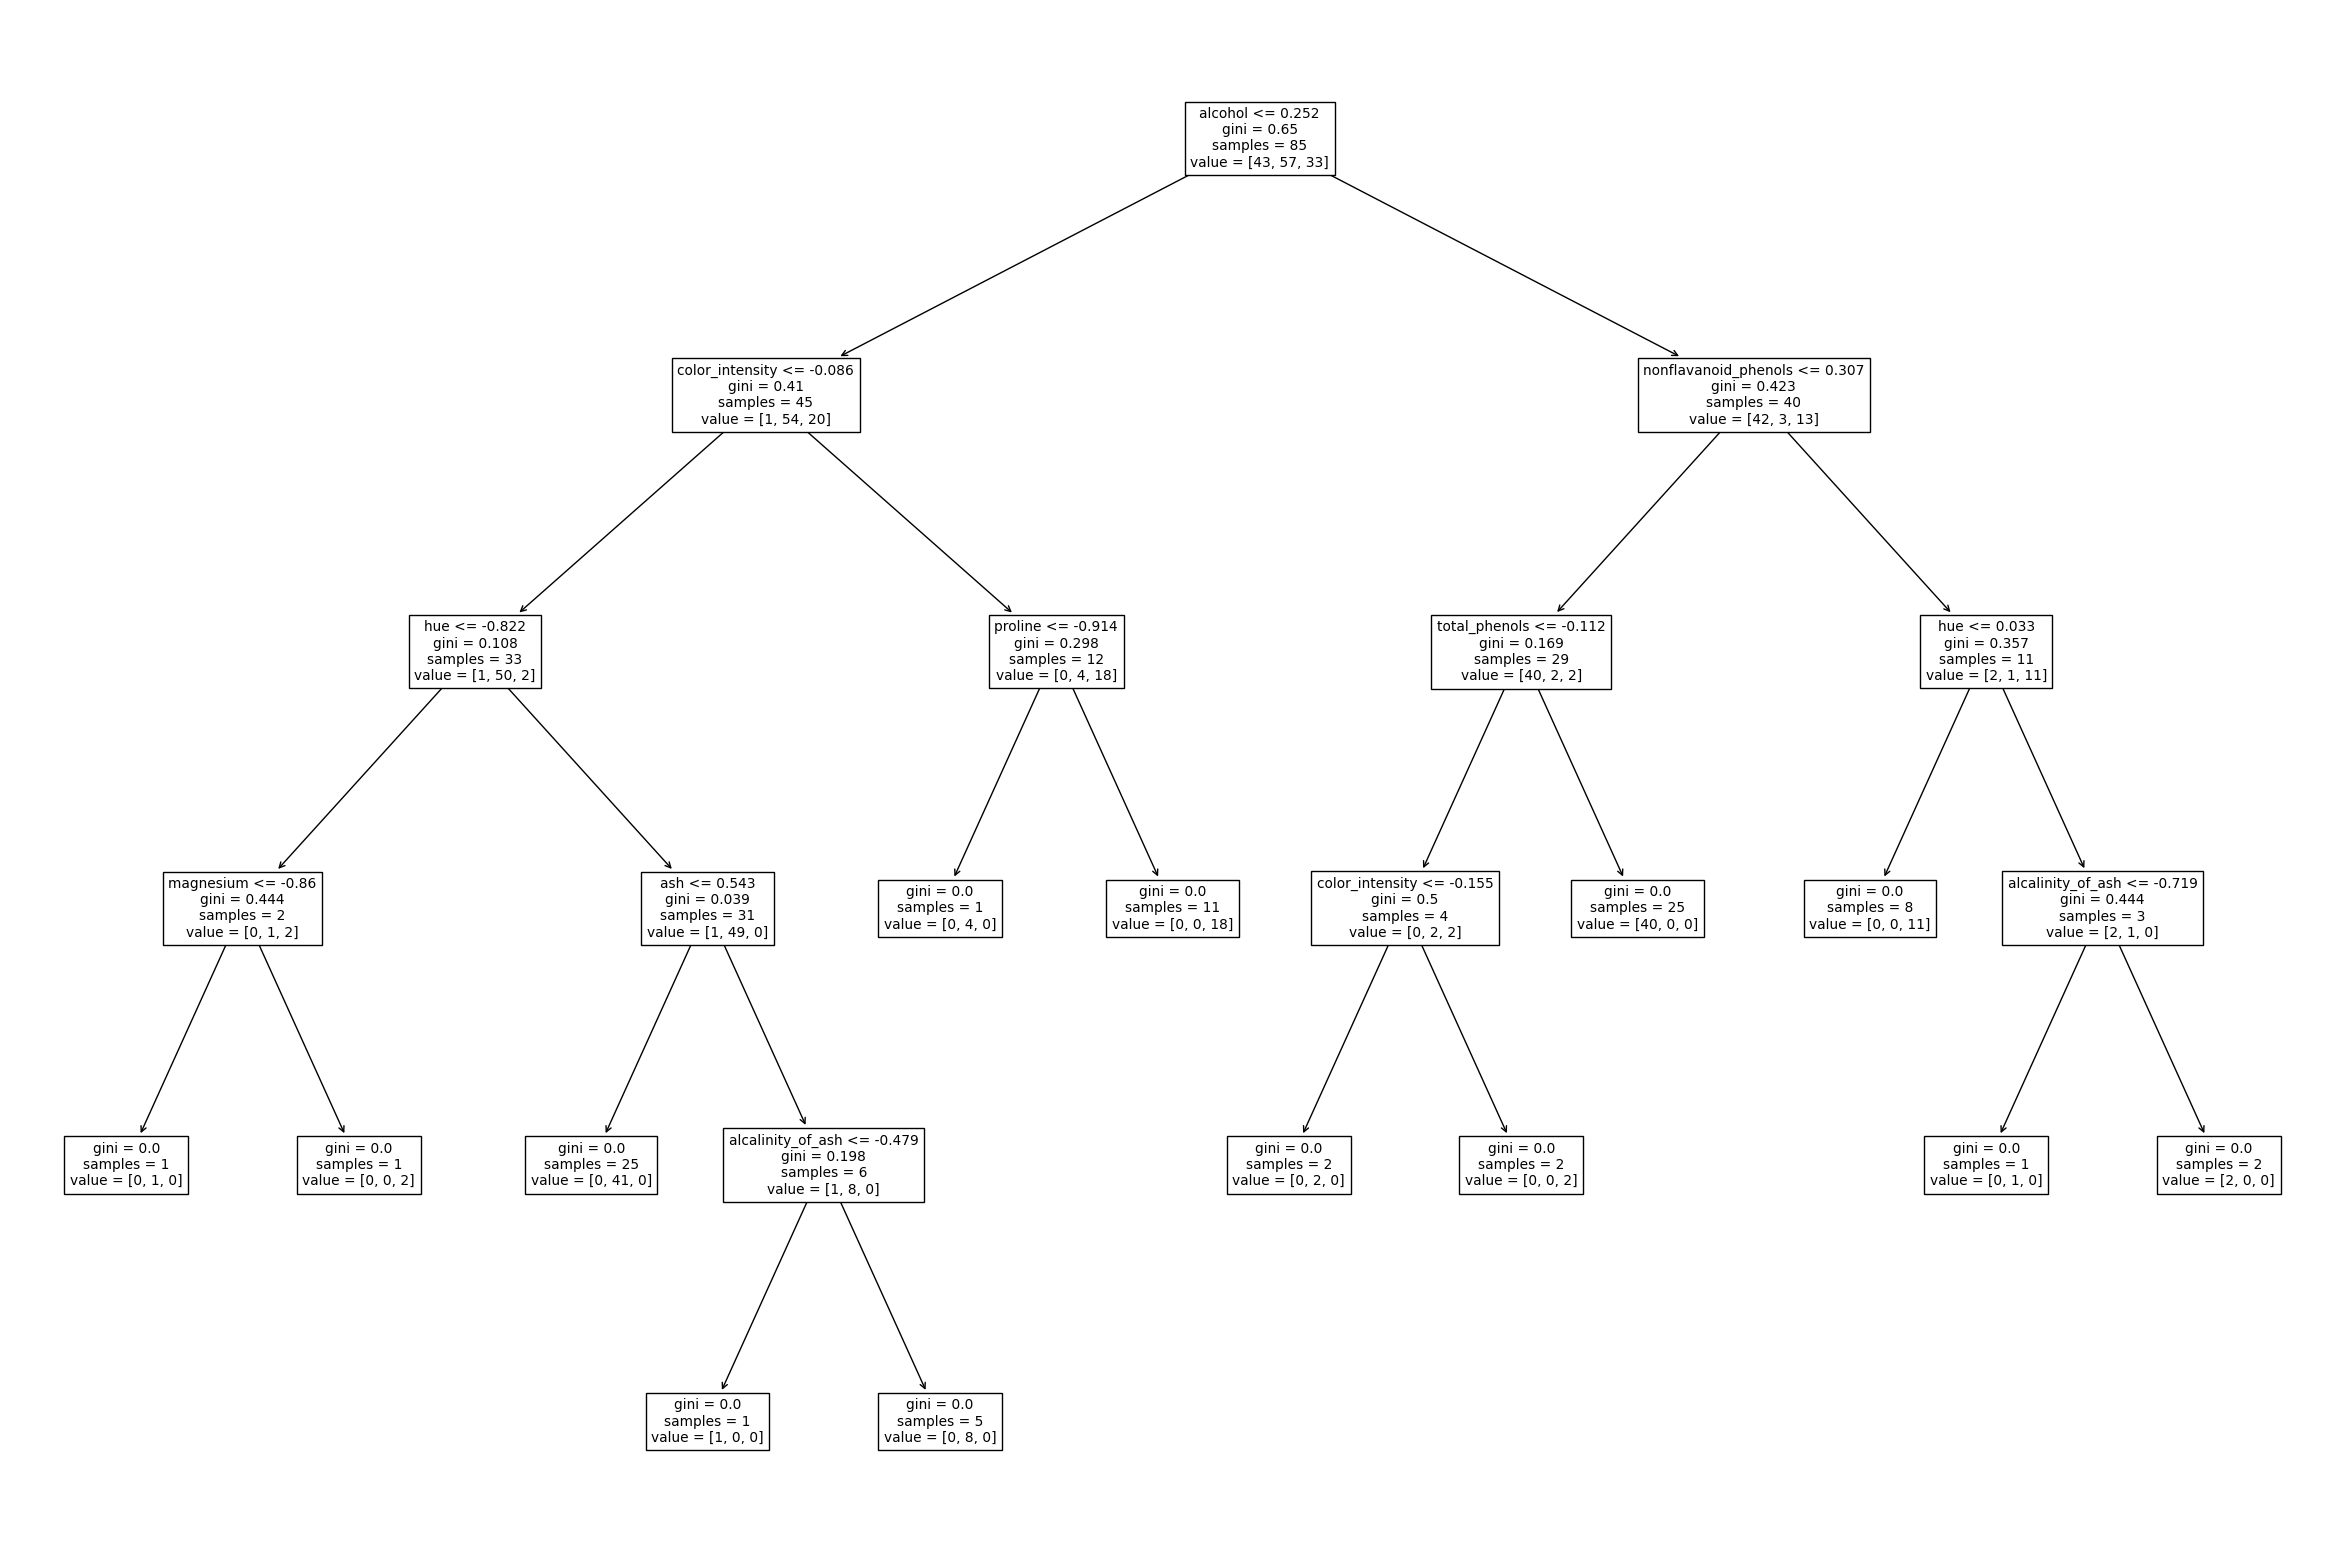

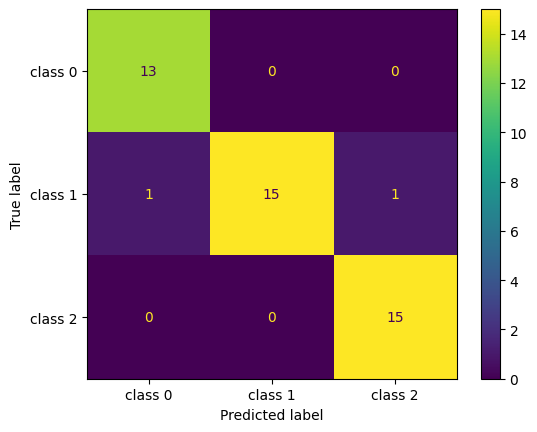

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)

plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = rf.predict(X_test)))


c1=classification_report(y_test, rf.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,rf.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()


# Support Vector Machine

Train data accuracy: 1.0
Test data accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



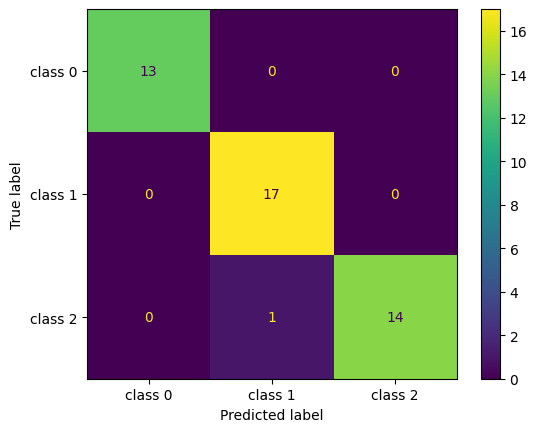

In [10]:
#SVM

from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = sv.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = sv.predict(X_test)))


c1=classification_report(y_test, sv.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, sv.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

# Stochastic gradient descent

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



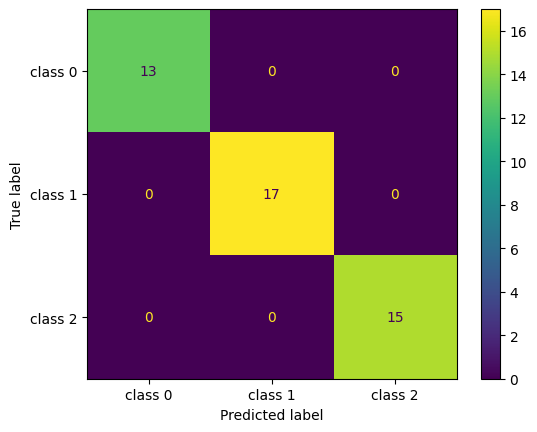

In [11]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

# XgBoost classifier

In [12]:
pip install xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Train data accuracy: 1.0
Test data accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.79      0.88      0.83        17
           2  

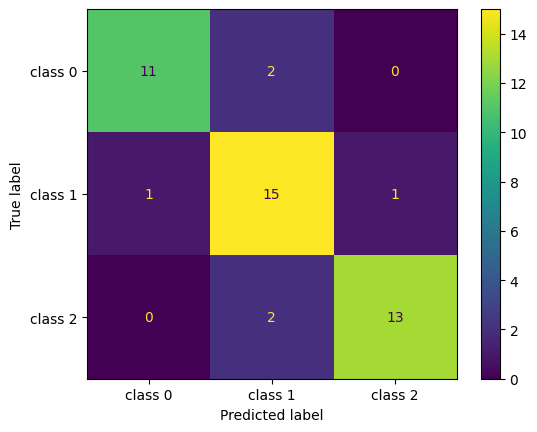

In [13]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=2)
model.fit(X_train, y_train)
print(model)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()



# Grid Search for BaggingClassifier

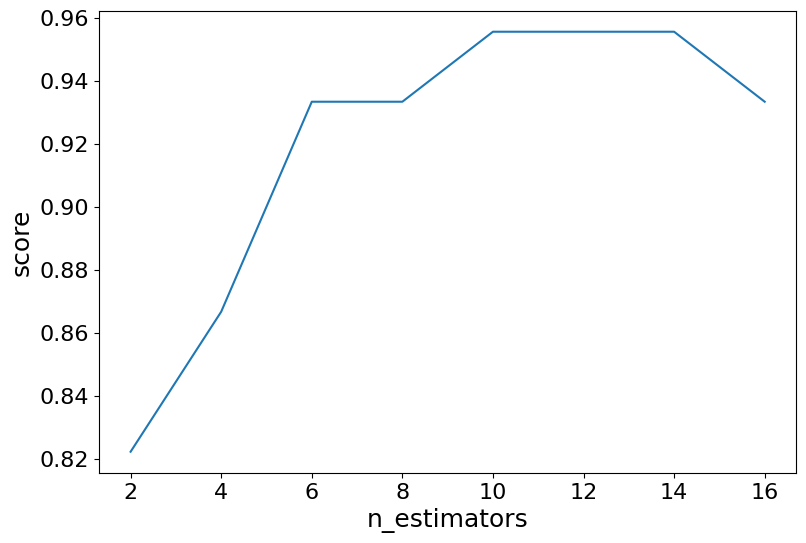

Train data accuracy: 1.0
Test data accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88        17
           2       0.93      0.93      0.93        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



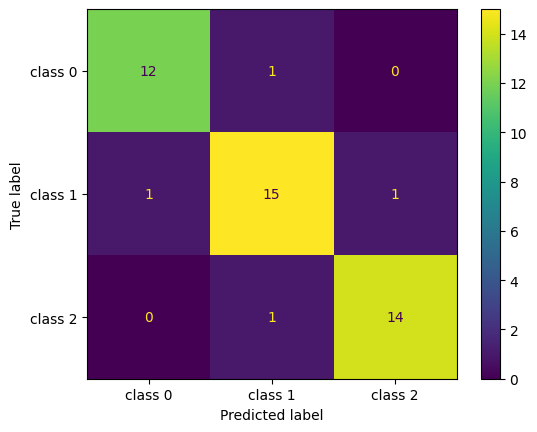

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at n_estimators = 12


bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()

# Grid Search for Logistic Regression

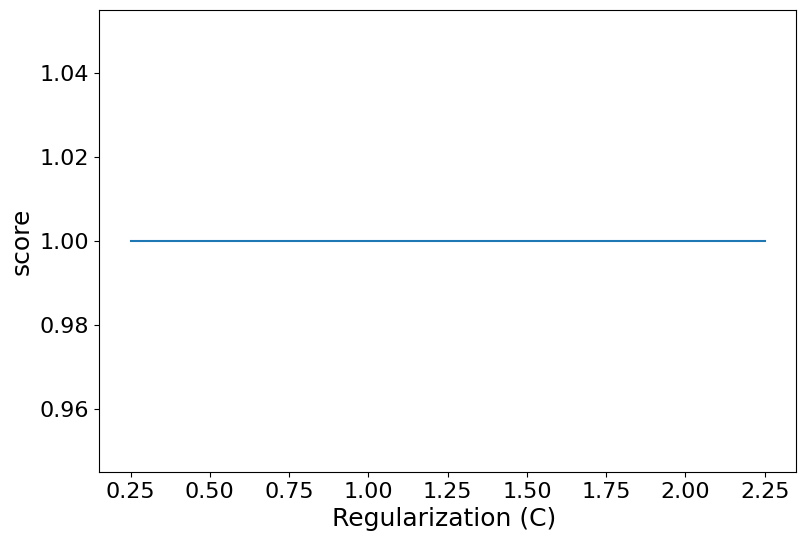

Train data accuracy: 1.0
Test data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



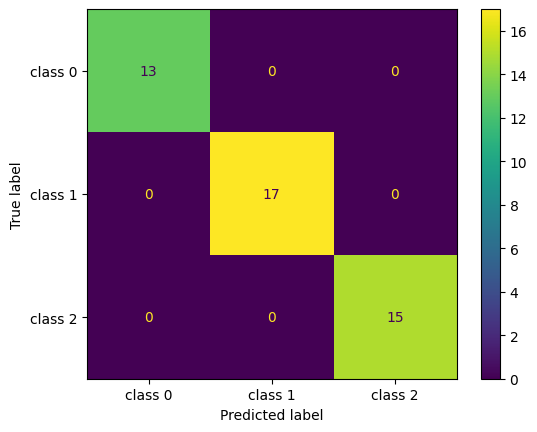

In [15]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression



logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25] #default value for C = 1

scores = []

for choice in C:
    logit.set_params(C=choice)
    logit.fit(X, y)
    scores.append(logit.score(X, y))

# Generate the plot of scores against C
plt.figure(figsize=(9,6))
plt.plot(C, scores)

# Adjust labels and font (to make visable)
plt.xlabel("Regularization (C) ", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at C=2
logr = LogisticRegression(max_iter = 10000)
logr.set_params(C=2)
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1','class 2'])
cm_display.plot()
plt.show()
